In [1]:
## Moses Giorgis

In [3]:
# November 20th 2020

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm as cm
from sklearn import tree
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from IPython.display import Image

In [5]:
data = pd.read_csv('C:\\Users\\mgior\\Downloads\\p2_zoo.csv', header = 0)
df = pd.DataFrame()

df = pd.concat([data, df])
df

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,class
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,mammal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1,mammal
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6,insect
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,mammal
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,mollusc.et.al


In [6]:
type(df.loc[3,'domestic'])

numpy.int64

In [7]:
nan_df = df[df.isna().any(axis = 1)]
nan_df.head()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,class


In [8]:
# Nice! No NANs.

In [9]:
for index, row in df.iterrows():
    print(index, row['class'])

0 mammal
1 mammal
2 fish
3 mammal
4 mammal
5 mammal
6 mammal
7 fish
8 fish
9 mammal
10 mammal
11 bird
12 fish
13 mollusc.et.al
14 mollusc.et.al
15 mollusc.et.al
16 bird
17 mammal
18 fish
19 mammal
20 bird
21 bird
22 mammal
23 bird
24 insect
25 amphibian
26 amphibian
27 mammal
28 mammal
29 mammal
30 insect
31 mammal
32 mammal
33 bird
34 fish
35 mammal
36 mammal
37 bird
38 fish
39 insect
40 insect
41 bird
42 insect
43 bird
44 mammal
45 mammal
46 mollusc.et.al
47 mammal
48 mammal
49 mammal
50 mammal
51 insect
52 amphibian
53 mollusc.et.al
54 mammal
55 mammal
56 bird
57 bird
58 bird
59 bird
60 fish
61 fish
62 reptile
63 mammal
64 mammal
65 mammal
66 mammal
67 mammal
68 mammal
69 mammal
70 mammal
71 bird
72 mollusc.et.al
73 fish
74 mammal
75 mammal
76 reptile
77 mollusc.et.al
78 bird
79 bird
80 reptile
81 mollusc.et.al
82 fish
83 bird
84 mammal
85 mollusc.et.al
86 fish
87 bird
88 insect
89 amphibian
90 reptile
91 reptile
92 fish
93 mammal
94 mammal
95 bird
96 mammal
97 insect
98 mammal
99 m

In [10]:
df['class'] = df['class'].replace(['fish', 'bird', 'insect', 'mollusc.et.al', 'reptile', 'amphibian'], 'non-mammal')
df

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,class
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,non-mammal
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,mammal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1,mammal
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6,non-mammal
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,mammal
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,non-mammal


In [11]:
pd.crosstab([df['eggs'],df['venomous']],df['class'])

class          mammal  non-mammal
eggs venomous                    
0    0             40           0
     1              0           2
1    0              1          52
     1              0           6

In [12]:
## Pretty clear distinction with these two features.

In [13]:
df.corr(method = 'pearson')

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


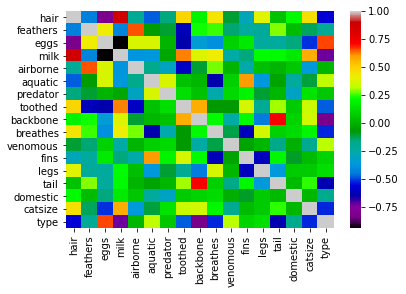

In [14]:
sns.heatmap(df.corr(), cmap = 'nipy_spectral', cbar = True, robust = False); 


In [15]:
df.head()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,class
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,non-mammal
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,mammal


In [16]:
Y = df['class']
X = df.drop(['class'] , axis = 1)
X

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [17]:
df.iloc[76:92]

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,class
76,seasnake,0,0,0,0,0,1,1,1,1,0,1,0,0,1,0,0,3,non-mammal
77,seawasp,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,7,non-mammal
78,skimmer,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0,2,non-mammal
79,skua,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0,2,non-mammal
80,slowworm,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,0,3,non-mammal
81,slug,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,non-mammal
82,sole,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4,non-mammal
83,sparrow,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2,non-mammal
84,squirrel,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,0,1,mammal
85,starfish,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,7,non-mammal


In [18]:
#for index, rows in df.iterrows():
    #print(index, rows['animal'])

In [19]:
testData = [['aardvark',1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,'mammal'],
           ['antelope',1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,'mammal'],
           ['bass',0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,'non-mammal'],
           ['bear',1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,'mammal'],
           ['boar',1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,'mammal'],
           ['buffalo',1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,'mammal'],
           ['calf',1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1,'mammal'],
           ['carp',0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4,'non-mammal'],
           ['catfish',0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,'non-mammal'],
           ['cavy',1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1,'mammal'],
           ['cheetah',1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,'mammal'],
           ['chicken',0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2,'non-mammal'],
           ['chub',0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,'non-mammal'],
           ['clam',0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,7,'non-mammal'],
           ['crab',0,0,1,0,0,1,1,0,0,0,0,0,4,0,0,0,7,'non-mammal'],
           ['crayfish',0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0,7,'non-mammal'],
           ['crow',0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2,'non-mammal'],
           ['deer',1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,'mammal'],
           ['dogfish',0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4,'non-mammal'],
           ['dolphin',0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1,1,'mammal'],
           ['dove',0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2,'non-mammal'],
           ['duck',0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,0,2,'non-mammal'],
           ['elephant',1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,'non-mammal'],
           ['flamingo',0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1,2,'mammal'],
           ['flea',0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6,'non-mammal'],
           ['frog',0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5,'non-mammal'],
           ['fruitbat',1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0,1,'mammal'],
           ['giraffe',1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,'mammal'],
           ['girl',1,0,0,1,0,0,1,1,1,1,0,0,2,0,1,1,1,'mammal'],
           ['gnat',0,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6,'non-mammal'],
           ['goat',1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1,'mammal'],
           ['gorilla',1,0,0,1,0,0,0,1,1,1,0,0,2,0,0,1,1,'mammal'],
           ['gull',0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0,2,'non-mammal'],
           ['haddock',0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4,'non-mammal'],
           ['hamster',1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,0,1,'mammal'],
           ['hare',1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1,'mammal'],
           ['hawk',0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2,'non-mammal'],
           ['herring',0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,'mammal'],
           ['honeybee',1,0,1,0,1,0,0,0,0,1,1,0,6,0,1,0,6,'non-mammal'],
           ['housefly',1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6,'non-mammal'],
           ['kiwi',0,1,1,0,0,0,1,0,1,1,0,0,2,1,0,0,2,'non-mammal'],
           ['ladybird',0,0,1,0,1,0,1,0,0,1,0,0,6,0,0,0,6,'non-mammal'],
           ['lark',0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2,'non-mammal'],
           ['leopard',1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,'mammal'],
           ['lion',1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,'mammal'],
           ['lobster',0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0,7,'non-mammal'],
           ['lynx',1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,'mammal'],
           ['mink',1,0,0,1,0,1,1,1,1,1,0,0,4,1,0,1,1,'mammal'],
            ['mole',1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1,'mammal'],
           ['mongoose',1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,'mammal'],
           ['moth',1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6,'non-mammal'],
           ['newt',0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,0,5,'non-mammal'],
           ['octopus',0,0,1,0,0,1,1,0,0,0,0,0,8,0,0,1,7,'non-mammal'],
           ['opossum',1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1,'mammal'],
           ['oryx',1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,'mammal'],
           ['ostrich',0,1,1,0,0,0,0,0,1,1,0,0,2,1,0,1,2,'non-mammal'],
           ['parakeet',0,1,1,0,0,0,0,0,1,1,0,0,2,1,0,1,2,'non-mammal'],
           ['penguin',0,1,1,0,0,1,1,0,1,1,0,0,2,1,0,1,2,'non-mammal'],
           ['pheasant',0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2,'non-mammal'],
           ['pike',0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4,'non-mammal'],
           ['piranha',0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,'non-mammal'],
           ['pitviper',0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,0,3,'non-mammal'],
           ['platypus',1,0,1,1,0,1,1,0,1,1,0,0,4,1,0,1,1,'mammal'],
           ['polecat',1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,'mammal'],
           ['pony',1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1,'mammal'],
           ['porpoise',0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1,1,'mammal'],
           ['puma',1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,'mammal'],
           ['pussycat',1,0,0,1,0,0,1,1,1,1,0,0,4,1,1,1,1,'mammal'],
           ['raccoon',1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,'mammal'],
           ['reindeer',1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1,'mammal'],
           ['rhea',0,1,1,0,0,0,1,0,1,1,0,0,2,1,0,1,2,'non-mammal'],
           ['scorpion',0,0,0,0,0,0,1,0,0,1,1,0,8,1,0,0,7,'non-mammal'],
           ['seahorse',0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4,'non-mammal'],
           ['seal',1,0,0,1,0,1,1,1,1,1,0,1,0,0,0,1,1,'mammal'],
           ['sealion',1,0,0,1,0,1,1,1,1,1,0,1,2,1,0,1,1,'mammal'],
           ['seasnake',0,0,0,0,0,1,1,1,1,0,1,0,0,1,0,0,3,'non-mammal'],
           ['seawasp',0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,7,'non-mammal'],
           ['skimmer',0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0,2,'non-mammal'],
           ['skua',0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0,2,'non-mammal'],
           ['slowworm',0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,0,3,'non-mammal'],
           ['slug',0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,'non-mammal'],
           ['sole',0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4,'non-mammal'],
           ['sparrow',0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2,'non-mammal'],
           ['squirrel',1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,0,1,'mammal'],
           ['starfish',0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,7,'non-mammal'],
           ['stingray',0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,4,'non-mammal'],
           ['swan',0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1,2,'non-mammal'],
           ['termite',0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6,'non-mammal'],
           ['toad',0,0,1,0,0,1,0,1,1,1,0,0,4,0,0,0,5,'non-mammal'],
           ['tortoise',0,0,1,0,0,0,0,0,1,1,0,0,4,1,0,1,3,'non-mammal'],
           ['tuatara',0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3,'non-mammal'],
           ['tuna',0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4,'non-mammal'],
           ['vampire',1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0,1,'mammal'],
           ['vole',1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1,'mammal'],
           ['vulture',0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1,2,'non-mammal'],
           ['wallaby',1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1,'mammal'],
           ['wasp',1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6,'non-mammal'],
           ['wolf',1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,'mammal'],
           ['worm',0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,'non-mammal'],
           ['wren',0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2,'non-mammal']]
testData = pd.DataFrame(testData, columns=df.columns)
testData

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,class
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,non-mammal
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,mammal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1,mammal
96,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6,non-mammal
97,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,mammal
98,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,non-mammal


In [20]:
testData.to_excel('testData.xlsx')

In [21]:
Y = df['class']
X = df.drop(['class', 'animal'] , axis = 1)

In [22]:
clf = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
clf = clf.fit(X,Y)

## We are splitting nodes based on 'gini' to measure the impurity of the split. This method is proven to be efficient, in a computational sense.
## We want to see values leaning on either end of a normal curve (0-1). A value nearing '0.5' is ruled absolutely impure.

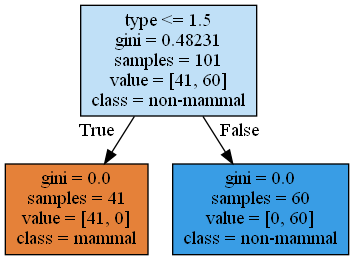

In [23]:
import pydotplus 
from IPython.display import Image

dot_df = tree.export_graphviz(clf, feature_names=X.columns, class_names=['mammal', 'non-mammal'], filled=True, 
                                out_file=None, precision = 5, impurity = True) 
graph = pydotplus.graph_from_dot_data(dot_df) 
Image(graph.create_png())

In [24]:
testY = testData['class']
testX = testData.drop(['animal','class'],axis=1)

predY = clf.predict(testX)
predictions = pd.concat([testData[['animal','class']],pd.Series(predY,name='predicted class')], axis=1)
predictions

,animal,class,predicted class
0,aardvark,mammal,mammal
1,antelope,mammal,mammal
2,bass,non-mammal,non-mammal
3,bear,mammal,mammal
4,boar,mammal,mammal
...,...,...,...
95,wallaby,mammal,mammal
96,wasp,non-mammal,non-mammal
97,wolf,mammal,mammal
98,worm,non-mammal,non-mammal


In [25]:
from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 0.97


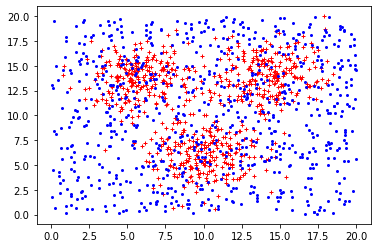

In [36]:
N = 1500

mean1 = [6, 14] 
mean2 = [10, 6]
mean3 = [14, 14]
cov = [[3.5, 0], [0, 3.5]]  # diagonal covariance

np.random.seed(50)
X = np.random.multivariate_normal(mean1, cov, int(N/6))
X = np.concatenate((X, np.random.multivariate_normal(mean2, cov, int(N/6))))
X = np.concatenate((X, np.random.multivariate_normal(mean3, cov, int(N/6))))
X = np.concatenate((X, 20*np.random.rand(int(N/2),2)))
Y = np.concatenate((np.ones(int(N/2)),np.zeros(int(N/2))))

plt.plot(X[:int(N/2),0],X[:int(N/2),1],'r+',X[int(N/2):,0],X[int(N/2):,1],'b.',ms=4)

In [27]:
### Train-Test Creation

Text(0, 0.5, 'Accuracy')

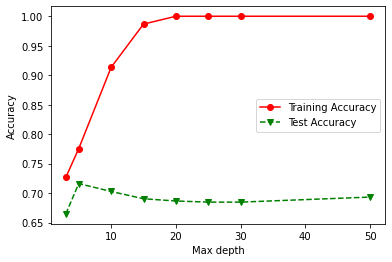

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.7, random_state=33)

maxdepths = [3,5,10,15,20,25,30,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
### Plot of training and test accuracies
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'gv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

In [29]:
# Model seems to have overfitted the given data. Let's try to other techniques to get a better grasp of our data.

Text(0, 0.5, 'Accuracy')

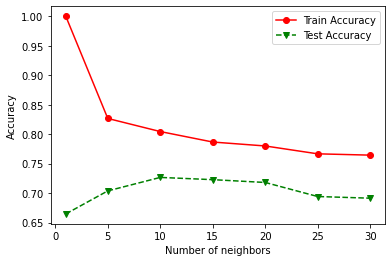

In [30]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(Y_train, Y_predTrain))
    testAcc.append(accuracy_score(Y_test, Y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'gv--')
plt.legend(['Train Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [31]:
 # Using 15 neighbors seems to be the best 'bang for our buck' as the trade off of train-test accuracy.
## KNN is method of supervised learning that measures distance, in different methods (in this case, minkowski), 
## of data points from set parameters or neighbors to predict a given, unknown instance.

Text(0, 0.5, 'Accuracy')

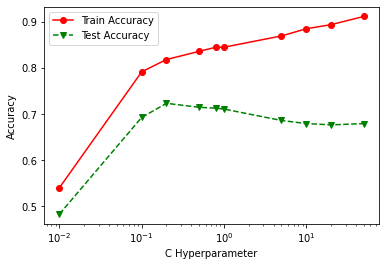

In [32]:
from sklearn.svm import SVC

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf = SVC(C=param,kernel='rbf',gamma='auto')
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    SVMtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(Y_test, Y_predTest))

plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'gv--')
plt.legend(['Train Accuracy','Test Accuracy'])
plt.xlabel('C Hyperparameter')
plt.xscale('log')
plt.ylabel('Accuracy')

In [33]:
# Setting the penalty term to be in between 0.1 and 1 seemed to be the best for model. The regularization was not too high or too low.

Text(0.5, 1.0, 'Test')

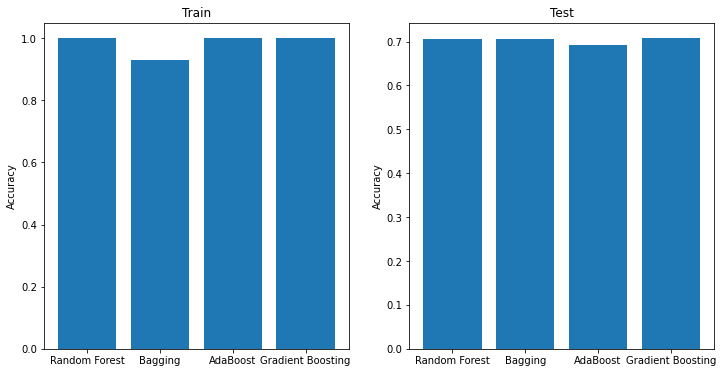

In [34]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

#Establishing hyperparameters of ensemble techniques
numBaseClassifiers = 500
maxdepth = 10
trainAcc = []
testAcc = []
# Random Forest first.
clf = ensemble.RandomForestClassifier(n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))
## Now that we've run a couple of algorithms to predict our test class, 
## Lets do an ensemble technique known as bagging to give us a mean or voted prediction based on train-test of k-models.
clf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))

clf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))

clf = ensemble.GradientBoostingClassifier(max_depth=maxdepth, n_estimators=numBaseClassifiers, learning_rate = 0.01)
clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))


methods = ['Random Forest', 'Bagging', 'AdaBoost', 'Gradient Boosting']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.bar([1.5,2.5,3.5,4.5], trainAcc)
ax1.set_xticks([1.5,2.5,3.5,4.5])
ax1.set_xticklabels(methods)
ax1.set_ylabel('Accuracy')
ax1.set_title('Train')
ax2.bar([1.5,2.5,3.5,4.5], testAcc)
ax2.set_xticks([1.5,2.5,3.5,4.5])
ax2.set_xticklabels(methods)
ax2.set_ylabel('Accuracy')
ax2.set_title('Test')

In [35]:
## It was a close battle but ultimately Random Forest proved to be the best algorithm for predicting our class.

# However, we can only get but simply a baseline from this suggestion. We cannot confidently say that this is true for a
# number of reasons such as: hyperparameter optimization and irreducible error from division of data into model subsets. 

## More testing and better knowledge of working data is needed for further exploration.